# Training neural network to predict ball position in a 3d space
## 1. Importing Libraries

In [143]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from utils.evaluate import evaluate_model
from utils.plot_maker import plot_maker_3d

## 2. Loading Data
The input data are 7 cameras each with a x and y coordinate of where the ball is in the camera's frame. The output data is the x, y and z coordinate of the ball in the 3d space.
To get the input data from the recordings I used the following notebook: ../DataProcessing/StoreDataOfAllRecordings.ipynb

In the input data I recorded the following trajectories:
- Circle
- Spiral
- Lissajous curve
- Spirograph motion

One of the Spirograph motion trajectories had 200 NaN values in the input data, so I used polynomial interpolation to fill in the missing values. Do to this I used this notebook: ../ball-prediction/TrajectoryPredictionInterpolation.ipynb

The interpolation only works if there are not too many NaN values in the input data and if the NaN values are not too close to each other.

In [144]:
X = pd.read_csv('../data/all/red_ball_128px_03-07.csv', decimal='.', delimiter=',')
y = pd.read_csv('../data/all/positions_xyz_03-07.csv', decimal='.', delimiter=',')
X.shape, y.shape

((12551, 14), (12551, 3))

## 3. Preprocessing

In [145]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

## 4. Hyperparameter tuning

In [146]:
pipeline = Pipeline([
    ('mlp', MLPRegressor())
])
# Best parameters: {'mlp__solver': 'sgd', 'mlp__max_iter': 20000, 'mlp__learning_rate_init': 0.1, 'mlp__learning_rate': 'adaptive', 'mlp__hidden_layer_sizes': (50, 100, 50), 'mlp__early_stopping': True, 'mlp__alpha': 0.001, 'mlp__activation': 'relu'}
model = MLPRegressor(solver='sgd', max_iter=20000, learning_rate_init=0.1, learning_rate='adaptive', hidden_layer_sizes=(50, 100, 50), early_stopping=True, alpha=0.001, activation='relu')

In [147]:
param_grid = {
    'mlp__hidden_layer_sizes': [ (50, 100, 50)],
    'mlp__activation': ['identity', 'tanh', 'relu'],
    'mlp__solver': ['sgd', 'adam'],
    'mlp__alpha': [0.001, 0.01, 0.1],
    'mlp__max_iter': [10000, 20000, 28000],
    'mlp__learning_rate': ['constant', 'adaptive'],
    'mlp__learning_rate_init': [0.001, 0.01, 0.1],
    'mlp__early_stopping': [True],
}
#random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

### 4.1 Training

In [148]:
#random_search.fit(X_scaled, y_scaled)

### 4.2 Best parameters

In [149]:
#print(f'Best parameters: {random_search.best_params_}')

In [150]:
#print(f'Best score: {random_search.best_score_}')

## 5. Training the model

In [151]:
#model = random_search.best_estimator_

In [152]:
model.fit(X_scaled, y_scaled)

MLPRegressor(alpha=0.001, early_stopping=True, hidden_layer_sizes=(50, 100, 50),
             learning_rate='adaptive', learning_rate_init=0.1, max_iter=20000,
             solver='sgd')

## 6. Make predictions on new data
The trajectories that I used to train the model are the following:
- Butterfly motion
- Random Walk
- 8 motion

### 6.1 Load new data

In [153]:
X_test_8 = pd.read_csv('../data/data-8/red_ball_coordinates_128px_2024-03-07_15h33m.csv', decimal='.', delimiter=',')
y_test_8 = pd.read_csv('../data/data-8/positions_xyz_2024-03-07_15h33m.csv', decimal='.', delimiter=',')
print(f'The amount of NaN values in 8 motion: {X_test_8.isna().sum().sum()}')
X_test_8.shape, y_test_8.shape

The amount of NaN values in 8 motion: 4


((513, 14), (517, 3))

In [154]:
X_test_butterfly_a = pd.read_csv('../data/data-butterfly/red_ball_coordinates_128px_2024-03-07_22h30m.csv', decimal='.', delimiter=',')
y_test_butterfly_a = pd.read_csv('../data/data-butterfly/positions_xyz_2024-03-07_22h30m.csv', decimal='.', delimiter=',')
print(f'The amount of NaN values in butterfly: {X_test_butterfly_a.isna().sum().sum()}')
X_test_butterfly_a.shape, y_test_butterfly_a.shape

The amount of NaN values in butterfly: 2


((514, 14), (518, 3))

In [155]:
X_test_butterfly_b = pd.read_csv('../data/data-butterfly/red_ball_coordinates_128px_2024-03-07_22h35m.csv', decimal='.', delimiter=',')
y_test_butterfly_b = pd.read_csv('../data/data-butterfly/positions_xyz_2024-03-07_22h35m.csv', decimal='.', delimiter=',')
print(f'The amount of NaN values in butterfly: {X_test_butterfly_b.isna().sum().sum()}')
X_test_butterfly_b.shape, y_test_butterfly_b.shape

The amount of NaN values in butterfly: 122


((513, 14), (517, 3))

There are 122 NaN values in the butterfly motion. I used polynomial interpolation to fill in the missing values.

In [156]:
X_test_butterfly_b = pd.read_csv('../data/data-butterfly/red_ball_coordinates_128px_2024-03-07_22h35m_interpolated.csv', decimal='.', delimiter=',')

In [157]:
X_test_random_walk = pd.read_csv('../data/data-random/red_ball_coordinates_128px_2024-03-07_21h46m.csv', decimal='.', delimiter=',')
y_test_random_walk = pd.read_csv('../data/data-random/positions_xyz_2024-03-07_21h46m.csv', decimal='.', delimiter=',').iloc[4:]
print(f'The amount of NaN values in random walk: {X_test_random_walk.isna().sum().sum()}')
X_test_random_walk.shape, y_test_random_walk.shape

The amount of NaN values in random walk: 12


((1005, 14), (1005, 3))

In [158]:
X_test_chaos = pd.read_csv('../data/data-chaos/red_ball_coordinates_128px_2024-03-07_21h24m.csv', decimal='.', delimiter=',')
y_test_chaos = pd.read_csv('../data/data-chaos/positions_xyz_2024-03-07_21h24m.csv', decimal='.', delimiter=',')
print(f'The amount of NaN values in chaos: {X_test_chaos.isna().sum().sum()}')

The amount of NaN values in chaos: 14


### 6.2 Preprocessing
This method is used to prepare the data for the model. It scales the input data and drops the NaN values from the output data.

In [159]:
def prepare_and_scale_test_data(X_test_val, y_test_val, scaler_x_test):
    y_test_val = y_test_val.iloc[4:]
    combined_test = pd.concat([X_test_val, y_test_val], axis=1)
    combined_test.dropna(inplace=True)
    X_val = combined_test.iloc[:, :14]
    y_val = combined_test.iloc[:, 14:]
    X_scaled_test = scaler_x_test.transform(X_val)
    return X_scaled_test, y_val

In [160]:
X_scaled_test_8, y_test_8 = prepare_and_scale_test_data(X_test_8, y_test_8, scaler_X)

In [161]:
X_scaled_test_butterfly_a, y_test_butterfly_a = prepare_and_scale_test_data(X_test_butterfly_a, y_test_butterfly_a, scaler_X)
X_scaled_test_butterfly_b, y_test_butterfly_b = prepare_and_scale_test_data(X_test_butterfly_b, y_test_butterfly_b, scaler_X)
X_scaled_test_random_walk, y_test_random_walk = prepare_and_scale_test_data(X_test_random_walk, y_test_random_walk, scaler_X)
X_scaled_test_chaos, y_test_chaos = prepare_and_scale_test_data(X_test_chaos, y_test_chaos, scaler_X)

### 6.3 Make predictions evaluate and visualize
This method is used to make predictions on the test data, then it evaluates the model using the mean squared error, mean absolute error and the r2 score. Finally, it visualizes the predicted and the actual trajectory of the ball in a 3d space.

In [162]:
def predict_evaluate_plot(X_test_val_scaled, y_test_val, nn_model, scaler_y_test, title='Trajectory of Ball in 3D Space'):
    y_test_predicted_scaled = nn_model.predict(X_test_val_scaled)
    y_test_pred = scaler_y_test.inverse_transform(y_test_predicted_scaled)
    mse, mae, r2 = evaluate_model(y_test_val, y_test_pred, 'Test Data')
    # change col 1 and 2 from place, so it corresponds to the unity 3d space
    y_test_pred = y_test_pred[:, [0, 2, 1]]
    y_test_val = y_test_val.to_numpy()[:, [0, 2, 1]]
    plot_maker_3d(y_test_val, y_test_pred, title)
    return y_test_pred, mse, mae, r2

Mean Squared Error on Test Data Set: 0.25066077508163725
Mean Absolute Error on Test Data Set: 0.4121240529257511
R2 Score on Test Data set: 0.8165599026099155


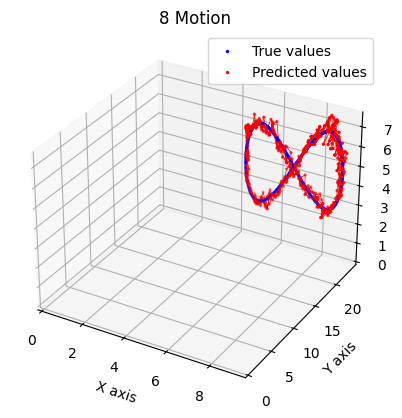

In [163]:
y_test_8_pred, mse_8, mae_8, r2_8 = predict_evaluate_plot(X_scaled_test_8, y_test_8, model, scaler_y, '8 Motion')

Mean Squared Error on Test Data Set: 0.16165357069808087
Mean Absolute Error on Test Data Set: 0.2939645790514837
R2 Score on Test Data set: 0.8553135308092908


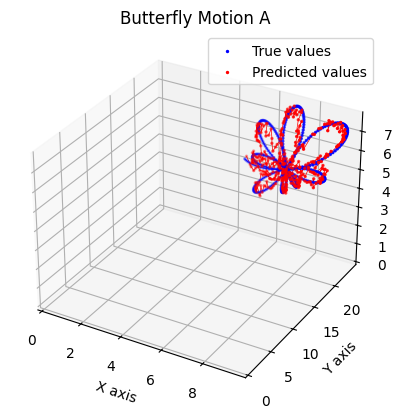

In [164]:
y_test_butterfly_a_pred, mse_butterfly_a, mae_butterfly_a, r2_butterfly_a = predict_evaluate_plot(X_scaled_test_butterfly_a[:400], y_test_butterfly_a[:400], model, scaler_y, 'Butterfly Motion A')
pd.DataFrame(y_test_butterfly_a[:400]).to_csv('../results/actual_positions_butterfly.csv', index=False)

Mean Squared Error on Test Data Set: 0.4146410466715857
Mean Absolute Error on Test Data Set: 0.4286400094262857
R2 Score on Test Data set: 0.8795600438997022


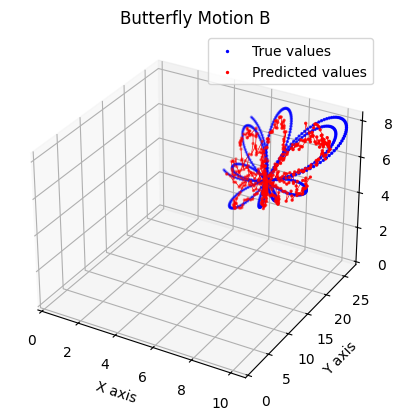

In [165]:
y_test_butterfly_b_pred, mse_butterfly_b, mae_butterfly_b, r2_butterfly_b = predict_evaluate_plot(X_scaled_test_butterfly_b, y_test_butterfly_b, model, scaler_y, 'Butterfly Motion B')

Mean Squared Error on Test Data Set: 0.6933743476888744
Mean Absolute Error on Test Data Set: 0.6138048579767235
R2 Score on Test Data set: 0.23959900242898588


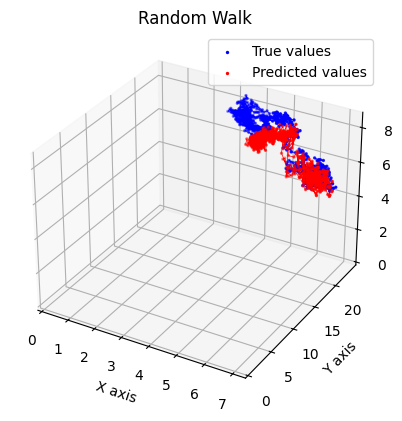

In [166]:
y_test_random_walk_pred, mse_random_walk, mae_random_walk, r2_random_walk = predict_evaluate_plot(X_scaled_test_random_walk, y_test_random_walk, model, scaler_y, 'Random Walk')